In [33]:
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt 
import datetime


from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression

In [15]:
quandl.ApiConfig.api_key = "BWQYTV19duLqfyoLNTNs"
df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]

In [16]:
df.head()

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833


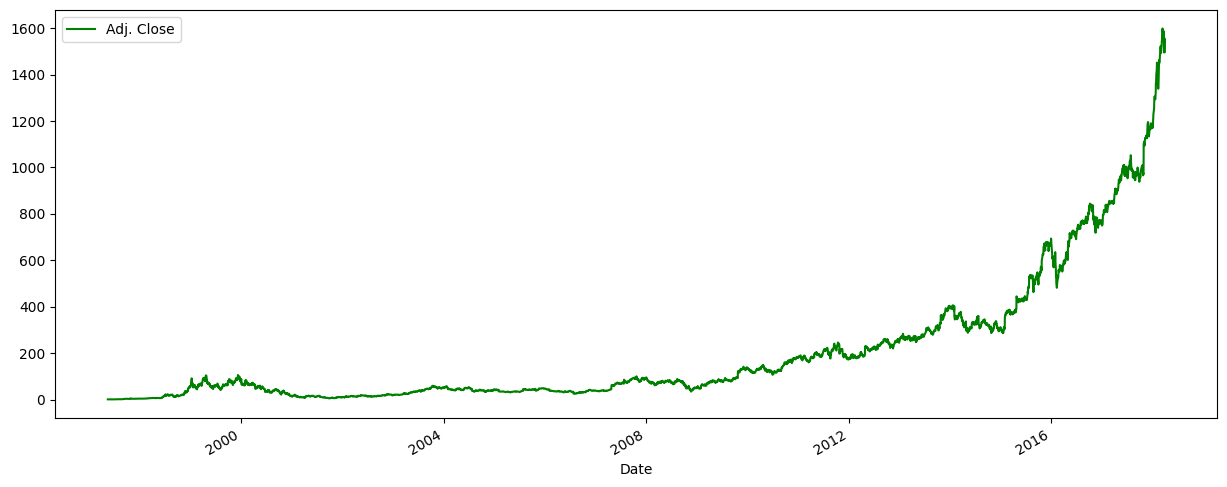

In [18]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [27]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], axis=1))
X = preprocessing.scale(X)
X_forecast = X[-forcast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)


(17282.0, 18029.5)

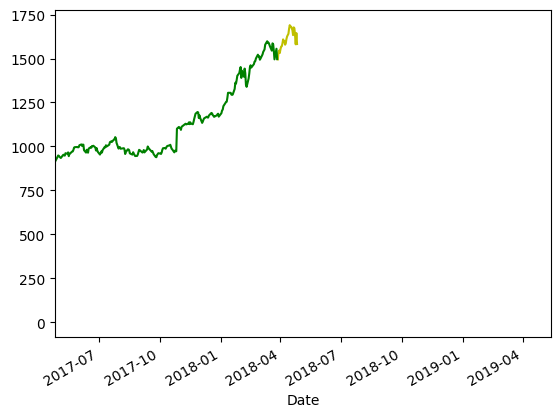

In [41]:
dates = pd.date_range (start = "2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted,color = 'y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017, 4, 26), xmax=datetime.date(2018, 4, 26))